# <a id='toc1_'></a>[Analisis de preferencia y patrones de uso de Taxis en Chicago](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Analisis de preferencia y patrones de uso de Taxis en Chicago](#toc1_)    
  - [Introducción](#toc1_1_)    
  - [Carga de librerías y archivos](#toc1_2_)    
  - [Preparación de los datos](#toc1_3_)    
    - [Cantidad de viajes por compañía](#toc1_3_1_)    
      - [Descripción](#toc1_3_1_1_)    
    - [Finalización de viajes por barrio](#toc1_3_2_)    
      - [Descripción](#toc1_3_2_1_)    
    - [Condiciones de clima en viajes Loop-O'Hare](#toc1_3_3_)    
      - [Descripción](#toc1_3_3_1_)    
  - [Exploración de los datos](#toc1_4_)    
    - [Cantidad de viajes por compañía](#toc1_4_1_)    
      - [Top 10 empresas con más viajes](#toc1_4_1_1_)    
    - [Finalización de viajes por barrio](#toc1_4_2_)    
  - [Prueba de hipótesis](#toc1_5_)    
  - [Conclusión general](#toc1_6_)    
    - [Exploración](#toc1_6_1_)    
    - [Hipótesis](#toc1_6_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introducción](#toc0_)

En el siguiente análisis vamos a encontrar patrones en la información de las empresas y barrios en donde operan los servicios de Taxis en Chicago. Intentaremos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Probaremos la siguiente hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

## <a id='toc1_2_'></a>[Carga de librerías y archivos](#toc0_)

In [6]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

from IPython.display import  display

In [7]:
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_nbhood_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_ohare_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

## <a id='toc1_3_'></a>[Preparación de los datos](#toc0_)

### <a id='toc1_3_1_'></a>[Cantidad de viajes por compañía](#toc0_)

#### <a id='toc1_3_1_1_'></a>[Descripción](#toc0_)
*Número de viajes por compañía de taxis, para el 15 y 16 de Noviembre de 2017.* 
- `company_name`: nombre de la empresa de taxis.
- `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [8]:
# Descripción e información
company_trips.info()
company_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [9]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


**Observaciones**

Observamos `64` registros sin valores ausentes ni problemas de tipo de dato.

### <a id='toc1_3_2_'></a>[Finalización de viajes por barrio](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Descripción](#toc0_)

*Promedio de viajes terminados en cada barrio en Noviembre de 2017.* 
- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes.
- `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [10]:
# Descripción e información
dropoff_nbhood_trips.info()
dropoff_nbhood_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
dropoff_nbhood_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


**Observaciones**

Tenemos `94` registros sin valores ausentes y sin problemas de tipo de dato.

### <a id='toc1_3_3_'></a>[Condiciones de clima en viajes Loop-O'Hare](#toc0_)

#### <a id='toc1_3_3_1_'></a>[Descripción](#toc0_)

*Información sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.*

- `start_ts`: fecha y hora de la recogida
- `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds`: duración del viaje en segundos

In [12]:
# Descripción e información
loop_ohare_trips.info()
loop_ohare_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [13]:
loop_ohare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


**Observaciones**

Tenemos `1068` valores sin ningún valor atípico, y notamos un tipo de dato incorrecto para `start_ts`, el cual debería ser `datetime` en lugar de `object`.

**Corrección de tipo de dato**

In [14]:
loop_ohare_trips.start_ts = pd.to_datetime(loop_ohare_trips.start_ts, format='%Y-%m-%d %H:%M:%S')

In [15]:
loop_ohare_trips.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

## <a id='toc1_4_'></a>[Exploración de los datos](#toc0_)

### <a id='toc1_4_1_'></a>[Cantidad de viajes por compañía](#toc0_)

Observemos la distribuciones de la cantidad de viajes en todas las compañías.

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

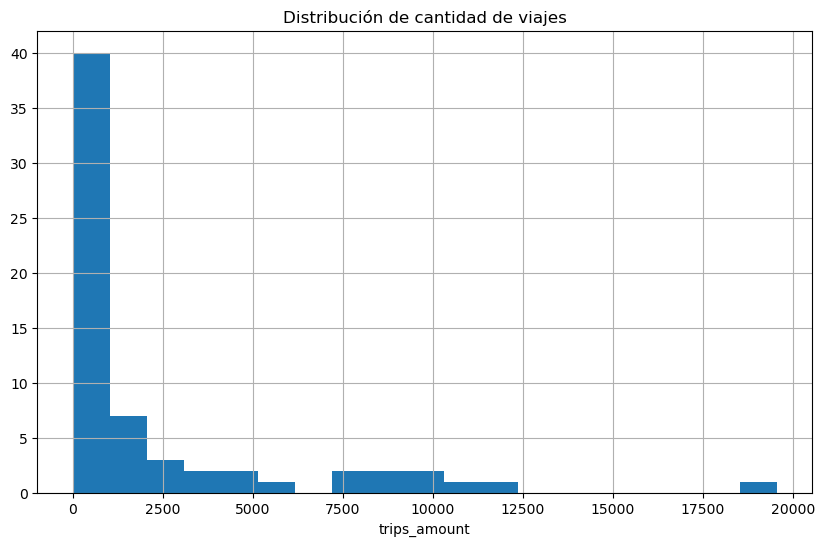

In [16]:
display(company_trips.trips_amount.describe())
company_trips.trips_amount.hist(bins='auto', figsize=(10,6))
plt.xlabel('trips_amount')
plt.title('Distribución de cantidad de viajes')
plt.show()

**Observaciones**

Podemos notar como la mitad de las empresas tuvieron máximo `178` viajes, y solo el 25% supero los `2,106` viajes, también podemos observar una diferencia considerable entre la media y la mediana. Exploremos un poco más los datos. 

**Analizando valores atípicos**

Exploremos los valores atípicos empleando el rango intercuartílico.

In [17]:
Q3 = company_trips.trips_amount.quantile(.75)
Q1 = company_trips.trips_amount.quantile(.25)
IQR =  Q3 - Q1
max_limit = Q3 + IQR * 1.5
min_limit = Q1 - IQR * 1.5

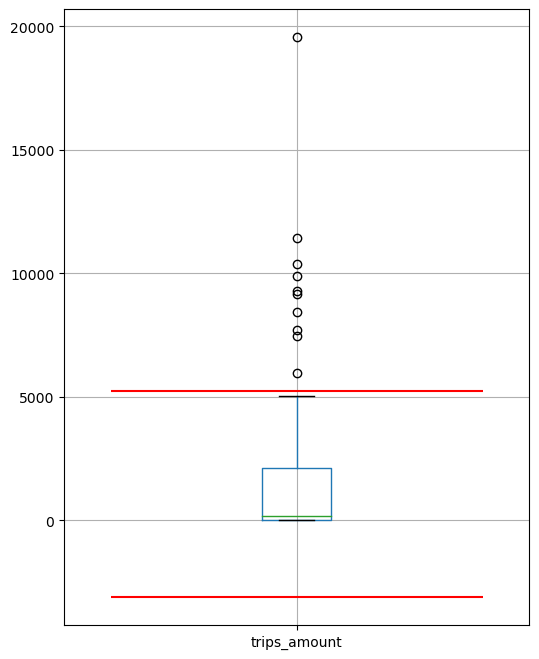

In [18]:
company_trips.boxplot(figsize=(6,8))
plt.hlines(y=max_limit, xmin=.6, xmax=1.4, color='red')
plt.hlines(y=min_limit, xmin=.6, xmax=1.4, color='red')
plt.show()

Observamos que tenemos valores atípicos por encima del límite superior.

In [19]:
company_trips.query('trips_amount > @max_limit')

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


**Observaciones**

Podemos observar que son 10 las empresas que estarían consideradas como valores atípicos en la cantidad de viajes que han realizado cada una.

**Pequeñas empresas**

Pudimos notar también que son una gran cantidad de empresas que tuvieron pocos viajes, como observamos la mediana es apenas de `178`, exploremos estas empresas que tuvieron viajes por debajo de la mediana.

In [20]:
company_median_trips = company_trips.trips_amount.median()
small_companies = company_trips.query('trips_amount < @company_median_trips')

,trips_amount
count,32.000000
mean,30.812500
std,37.280487
min,2.000000
25%,12.750000
50%,20.500000
75%,31.500000
max,147.000000


,company_name,trips_amount
32,Leonard Cab Co,147
33,Metro Jet Taxi A,146
34,Norshore Cab,127
35,6742 - 83735 Tasha ride inc,39
36,3591 - 63480 Chuks Cab,37
37,1469 - 64126 Omar Jada,36
38,6743 - 78771 Luhak Corp,33
39,0118 - 42111 Godfrey S.Awir,33
40,6574 - Babylon Express Inc.,31
41,Chicago Star Taxicab,29


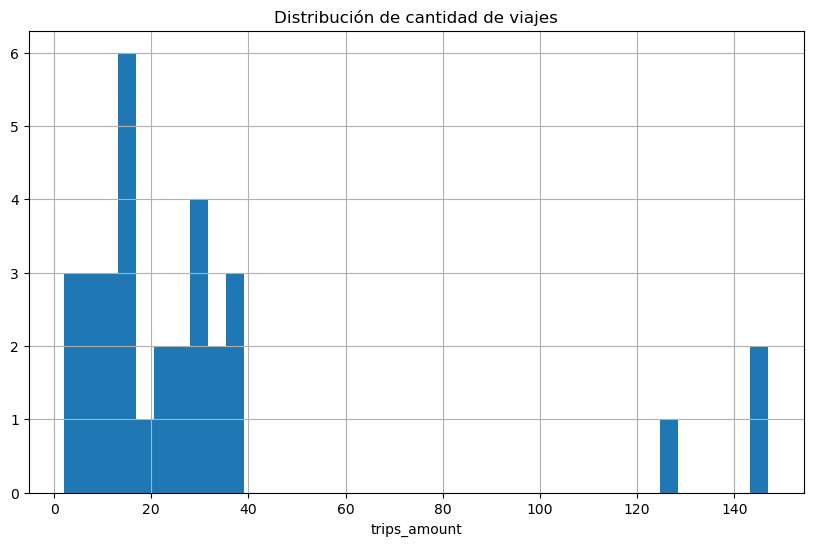

In [21]:
display(small_companies.describe())
display(small_companies.head(10))
small_companies.trips_amount.hist(bins=39, figsize=(10,6))
plt.title('Distribución de cantidad de viajes')
plt.xlabel('trips_amount')
plt.show()

In [22]:
print(f'Porcentaje de viajes realizados por la mitad de las empresas por debajo de la mediana: {small_companies.trips_amount.sum() / company_trips.trips_amount.sum():0.2%}')

Porcentaje de viajes realizados por la mitad de las empresas por debajo de la mediana: 0.72%


**Conclusiones intermedias**

Analizando este conjunto el cual corresponde a las empresas con menos viajes por debajo de la mediana, es decir el 50% con menos viajes de las empresas listadas, observamos como ni siquiera llegan al 1% de la cantidad total de viajes, algo que se puede hacer notar también es un patrón peculiar en el nombre de estas empresas con menos viajes, los cuales tienen un número al inicio de su nombre, que podría corresponder a un número público de vehículo/identificación en Chicago, lo que de confirmarse podría indicar que estas empresas son registros de conductores independientes, de allí la diferencia de viajes respecto al resto. Con esta información podríamos explicar la gran diferencia de existente entre la media y la mediana en el número de viajes de cada empresa.

#### <a id='toc1_4_1_1_'></a>[Top 10 empresas con más viajes](#toc0_)

Centrándonos en explorar los datos de los competidores, retomaremos el análisis en las empresas con mayor cantidad de viajes, exploremos las primeras 10 empresas con más viajes, como vimos anteriormente son en estas empresas en donde se concentran la mayoría de viajes.

In [23]:
top_companies = company_trips.head(10)
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


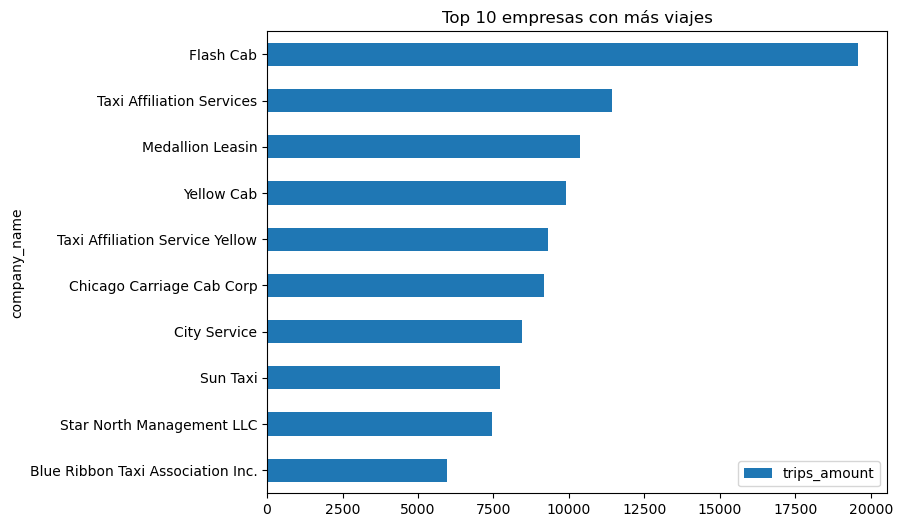

In [24]:
top_companies.sort_values(by='trips_amount').plot.barh(x='company_name', y='trips_amount', figsize=(8,6))
plt.title('Top 10 empresas con más viajes')
plt.show()

In [25]:
print(f'Porcentaje de viajes de las 10 empresas con más viajes: {top_companies.trips_amount.sum()/ company_trips.trips_amount.sum():0.2%}')

Porcentaje de viajes de las 10 empresas con más viajes: 72.30%


**Conclusiones intermedias**

Podemos observar como es `Flash Cab` la empresa con mayor cantidad de viajes con una diferencia considerable respecto al segundo lugar, el cual es `Taxi Affiliation Services`, desde allí para abajo en estos registros se notan como es menor la diferencia entre cada una. En conjunto estas 10 empresas representan el `72%` de todos los viajes, que como pudimos ver anteriormente es en la mitad de las empresas en donde se concentran el 99% de los viajes, por lo que con base en estas observaciones podríamos decir que son un conjunto concreto las empresas que tienen la mayoría de todos los viajes.

### <a id='toc1_4_2_'></a>[Finalización de viajes por barrio](#toc0_)

Ahora veamos a detalle el promedio de finalización de viaje en cada barrio en el mes de Noviembre. Seleccionemos los 10 barrios principales por número su promedio de finalización de viajes.

In [26]:
top_nbhoods = dropoff_nbhood_trips.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


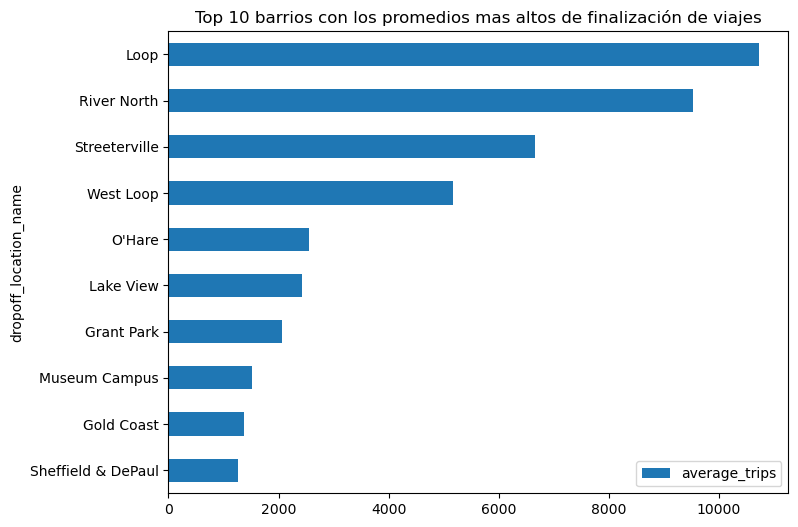

In [27]:
display(top_nbhoods)
top_nbhoods.sort_values(by='average_trips').plot.barh(x='dropoff_location_name', figsize=(8,6))
plt.title('Top 10 barrios con los promedios mas altos de finalización de viajes')
plt.show()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

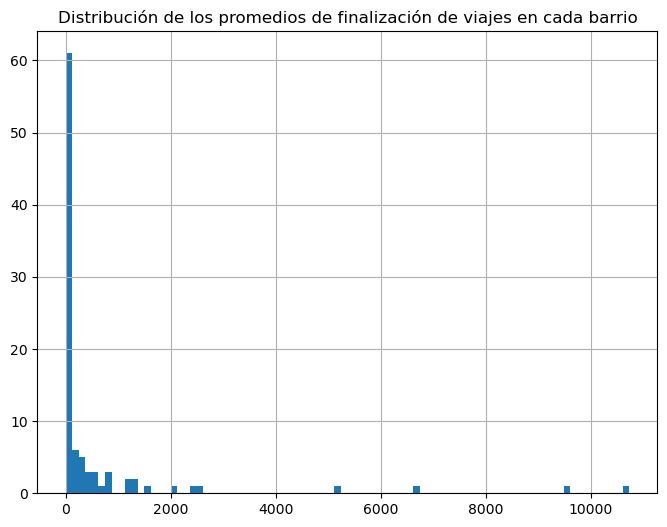

In [28]:
display(dropoff_nbhood_trips.average_trips.describe())
dropoff_nbhood_trips.hist(figsize=(8,6), column='average_trips', bins='auto')
plt.title('Distribución de los promedios de finalización de viajes en cada barrio')
plt.show()

**Conclusiones intermedias**

Dentro de los 10 barrios con los promedios de finalización de viajes más altos encontramos como encabezan los de barrios de `Loop`, `River North`, `Streeterville` y `West Loop`, siendo el cuarto puesto, `O'hare`, apenas la mitad del promedio de `West Loop`. Observando los estadísticos y el histograma de la distribución de cada promedio de finalización de viejas, notamos algo similar a lo visto en el número total de viajes por empresa, siendo muchos barrios que mantienen un promedio bajo de finalización de viajes, respecto a los barrios con más, teniendo en este caso el 75% de los barrios con un promedio por debajo de los 300 viajes.    

## <a id='toc1_5_'></a>[Prueba de hipótesis](#toc0_)

Ahora probemos nuestra hipótesis, obtendremos dos conjuntos para establecer uno para aquellos días que fueron lluviosos y otros para los que no.

**H₀ (Hipótesis nula):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos.

**H₁ (Hipótesis alternativa):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [29]:
rainy_saturdays = loop_ohare_trips.query('weather_conditions == "Bad"').duration_seconds
good_saturdays = loop_ohare_trips.query('weather_conditions == "Good"').duration_seconds

display(rainy_saturdays.describe())
good_saturdays.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Debido a que tenemos interés de comparar las medias de nuestras muestras utilizaremos `ttest_ind`, antes realizaremos una prueba de Levene para saber si debemos considerar las varianzas iguales o no. Realizaremos las pruebas con un nivel de significación de 5%.

**Prueba de Levene**

In [30]:
alpha = 0.05
results = st.levene(
    rainy_saturdays,
    good_saturdays)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No rechazamos la hipótesis nula: Las varianzas son iguales.")

p-value:  0.5332038671974493
No rechazamos la hipótesis nula: Las varianzas son iguales.


**Probando nuestra hipótesis**

Con nuestra prueba podemos concluir en que las varianzas son estadisticamente iguales, podemos proceder a probar nuestra hipótesis, considerando esto.

In [31]:
# Prueba de hipótesis
results = st.ttest_ind(
                rainy_saturdays,
                good_saturdays,
                equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  6.517970327099473e-12
Rechazamos la hipótesis nula


## <a id='toc1_6_'></a>[Conclusión general](#toc0_)

### <a id='toc1_6_1_'></a>[Exploración](#toc0_)
- Cantidad de viajes en cada empresa: Analizando los datos que tenemos sobre los viajes de cada empresa pudimos observar como del conjunto completo son pocas las empresas que acumulan la mayoría de viajes, siendo las 10 empresas con más viajes las que acumulan el 72% del total de los viajes realizados.
    
- En cuanto a la finalización promedio de cada barrio, no encontramos en que los cuatro barrios que destacan considerablemente con los promedios más altos de finalización son; `Loop`, `River North`, `Streeterville` y `West Loop`. Teniendo por otro lado el 75% de barrios con menos de 300 viajes en promedio.

### <a id='toc1_6_2_'></a>[Hipótesis](#toc0_)

*"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos."*

Basado en nuestra prueba podemos decir que los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **la duración promedio si cambia** los sábados lluviosos.